# **Task 3: Customer Churn Prediction**

**Objective:**
Identify customers who are likely to leave the bank.

**Dataset:**
Churn Modelling Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/task 2/Churn_Modelling.csv'
df = pd.read_csv(file_path)

# Check basic info and missing values
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geogr

In [6]:
df.head(5)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
print(df.dtypes)

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


In [8]:
# examining each column's data and its type

for i in df.columns:
    print(i, df[i].unique(), df[i].dtype)
    print('-'* 100)

RowNumber [    1     2     3 ...  9998  9999 10000] int64
----------------------------------------------------------------------------------------------------
CustomerId [15634602 15647311 15619304 ... 15584532 15682355 15628319] int64
----------------------------------------------------------------------------------------------------
Surname ['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge'] object
----------------------------------------------------------------------------------------------------
CreditScore [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461

this data set is clean

***Gender Encoding (Binary)***


Convert "Male" and "Female" into 1s and 0s:


In [37]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

Geography Encoding (One-Hot)

Turn "France", "Germany", "Spain" into separate binary columns:


In [38]:
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)


In [39]:
print(df.head())
print(df.dtypes)

   CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619       0   42       2       0.00              1          1   
1          608       0   41       1   83807.86              1          0   
2          502       0   42       8  159660.80              3          1   
3          699       0   39       1       0.00              2          0   
4          850       0   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_Germany  Geography_Spain  
0               1        101348.88       1              False            False  
1               1        112542.58       0              False             True  
2               0        113931.57       1              False            False  
3               0         93826.63       0              False            False  
4               1         79084.10       0              False             True  
CreditScore            int64
Gender                 int64

Train a classification model like Logistic Regression or Decision Tree.


In [21]:
cols_to_drop = ['RowNumber', 'CustomerId', 'Surname']
df.drop(columns=[col for col in cols_to_drop if col in df.columns], inplace=True)


In [22]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [29]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)
log_preds = log_model.predict(X_test_scaled)

In [31]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)
log_preds = log_model.predict(X_test_scaled)

In [33]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train_scaled, y_train)
tree_preds = tree_model.predict(X_test_scaled)

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Logistic Regression
print("🔵 Logistic Regression Accuracy:", accuracy_score(y_test, log_preds))
print(confusion_matrix(y_test, log_preds))
print(classification_report(y_test, log_preds))

# Decision Tree
print("🟢 Decision Tree Accuracy:", accuracy_score(y_test, tree_preds))
print(confusion_matrix(y_test, tree_preds))
print(classification_report(y_test, tree_preds))

🔵 Logistic Regression Accuracy: 0.811
[[1543   64]
 [ 314   79]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

🟢 Decision Tree Accuracy: 0.7805
[[1362  245]
 [ 194  199]]
              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1607
           1       0.45      0.51      0.48       393

    accuracy                           0.78      2000
   macro avg       0.66      0.68      0.67      2000
weighted avg       0.79      0.78      0.79      2000



🔵 Logistic Regression
Accuracy: 0.811


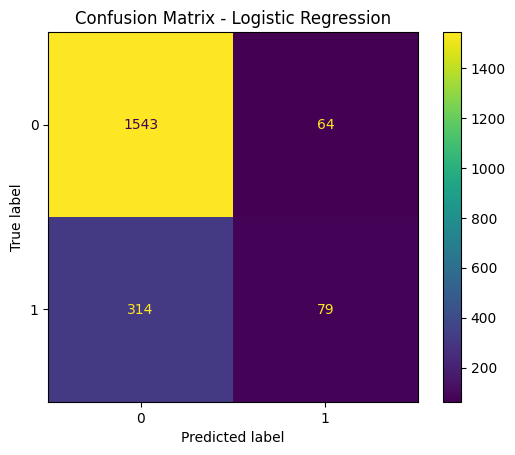

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000


🟢 Decision Tree
Accuracy: 0.7805


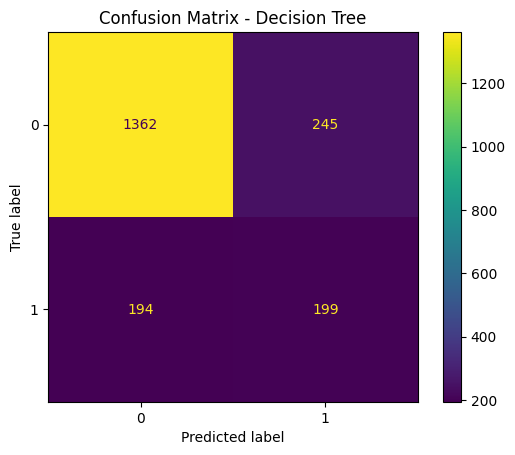

              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1607
           1       0.45      0.51      0.48       393

    accuracy                           0.78      2000
   macro avg       0.66      0.68      0.67      2000
weighted avg       0.79      0.78      0.79      2000



In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

# Logistic Regression Evaluation
print("🔵 Logistic Regression")
print("Accuracy:", accuracy_score(y_test, log_preds))
ConfusionMatrixDisplay.from_predictions(y_test, log_preds)
plt.title("Confusion Matrix - Logistic Regression")
plt.show()
print(classification_report(y_test, log_preds))

# Decision Tree Evaluation
print("\n🟢 Decision Tree")
print("Accuracy:", accuracy_score(y_test, tree_preds))
ConfusionMatrixDisplay.from_predictions(y_test, tree_preds)
plt.title("Confusion Matrix - Decision Tree")
plt.show()
print(classification_report(y_test, tree_preds))

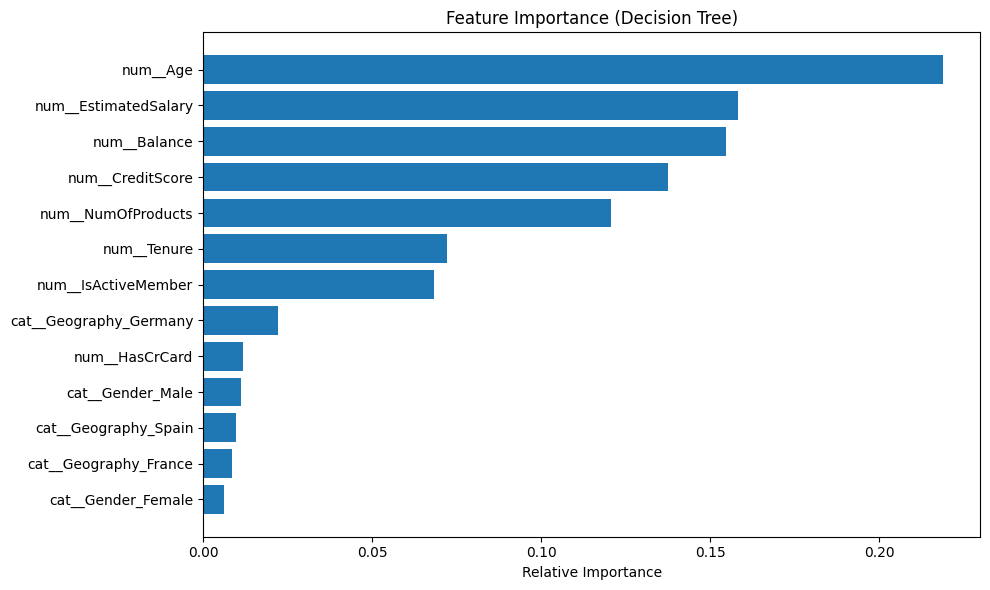

In [42]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Get feature importances
importances = tree_model.feature_importances_

# Get feature names after preprocessing
# The preprocessor has a get_feature_names_out() method
features = preprocessor.get_feature_names_out()


# Visualize
plt.figure(figsize=(10, 6))
indices = np.argsort(importances)
plt.barh(range(len(importances)), importances[indices], align='center')
plt.yticks(range(len(importances)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.title('Feature Importance (Decision Tree)')
plt.tight_layout()
plt.show()

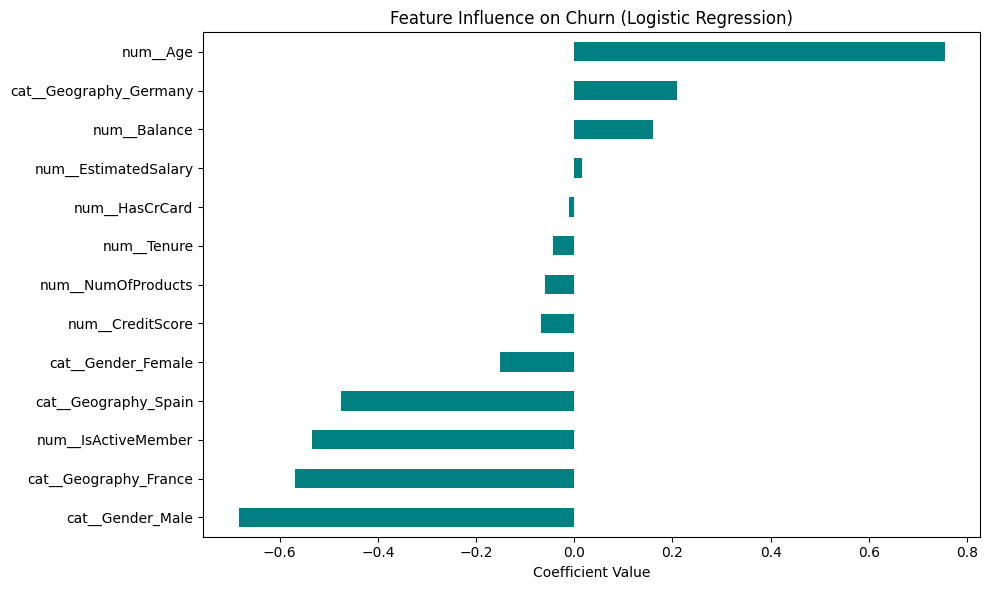

In [44]:
# Retrieve feature names and coefficients
features = preprocessor.get_feature_names_out()
coeffs = pd.Series(log_model.coef_[0], index=features)

# Sort and visualize
coeffs_sorted = coeffs.sort_values()
coeffs_sorted.plot(kind='barh', figsize=(10, 6), color='teal')
plt.title("Feature Influence on Churn (Logistic Regression)")
plt.xlabel("Coefficient Value")
plt.tight_layout()
plt.show()